In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

En primer lugar se importarán las librerias a utilizar al igual que el dataset que contiene la información

In [11]:
df.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [12]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [16]:

df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Se hace una observación general de los datos como conjunto, sin separar por variables.

Text(0.5, 0, 'Ages')

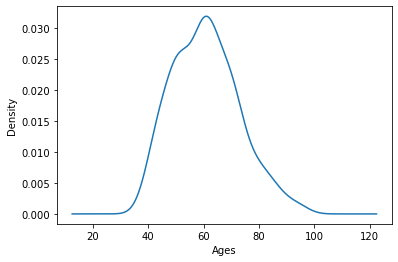

In [27]:
ax = df['age'].plot.kde()
ax.set_xlabel('Ages')

Ahora se hace un analisis de distribución de la edad sobre todo el dataset, se observa que no es normal

125


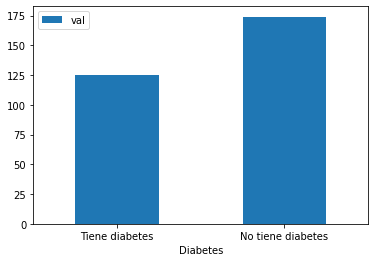

In [54]:

a = pd.array(df['diabetes'])
#df.count()
c = 0
d = 0
for b in a:
    if b == 1:
        c = c+1
        
for b in a:
    if b == 0:
        d = d+1

pf = pd.DataFrame({'Diabetes':['Tiene diabetes', 'No tiene diabetes'], 'val':[c, d]})

ax = pf.plot.bar(x='Diabetes', y='val', rot=0)


Ahora se hace un diagrama de barras para observar de una de las variables dicotomicas o booleanas que proporción hay en el total de datos y se observa que en este dataset hay mas personas sin diabetes que con diabetes
Es importante tener esto claro ya que cuando llegue el momento de preparar un modelo para hacer predicciones con esta información podemos tener un punto de referencia a la hora de probar que tan correcto es el modelo.

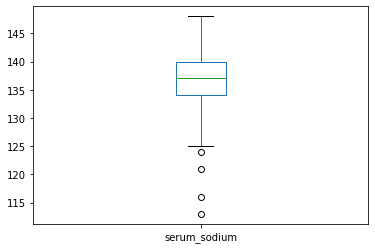

In [31]:

ax = df['serum_sodium'].plot.box()

Mediante un diagrama de caja se evalua la variable serum_sodium para observar como se comporta, es evidente que contiene 4 datos atipicos que por el momento no retiraremos ya que esta primera parte es solo exploración de los datos

In [55]:
df['platelets'].describe()

count       299.000000
mean     263358.029264
std       97804.236869
min       25100.000000
25%      212500.000000
50%      262000.000000
75%      303500.000000
max      850000.000000
Name: platelets, dtype: float64

In [56]:
df['ejection_fraction'].describe()

count    299.000000
mean      38.083612
std       11.834841
min       14.000000
25%       30.000000
50%       38.000000
75%       45.000000
max       80.000000
Name: ejection_fraction, dtype: float64

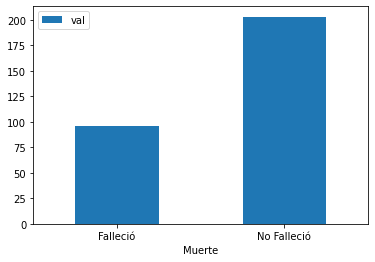

In [57]:
a = pd.array(df['DEATH_EVENT'])
#df.count()
c = 0
d = 0
for b in a:
    if b == 1:
        c = c+1
        
for b in a:
    if b == 0:
        d = d+1

pf = pd.DataFrame({'Muerte':['Falleció', 'No Falleció'], 'val':[c, d]})

ax = pf.plot.bar(x='Muerte', y='val', rot=0)

En este caso observamos la variable que en su momento querremos predecir, que es la que representa si la persona fallece o no ya dependiendo de muchos factores que en su momento serán analizados